In [15]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import torch

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]

image = torch.zeros(24,24, 3)
input_tensor = torch.zeros(1,3,24,24)# Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layer=target_layers[0], use_cuda=True)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# If target_category is None, the highest scoring category
# will be used for every image in the batch.
# target_category can also be an integer, or a list of different integers
# for every image in the batch.
target_category = 281

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(image.numpy(), grayscale_cam, use_rgb=True)

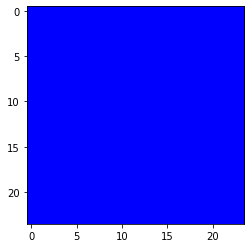

In [16]:
from matplotlib import pyplot as plt
plt.imshow(visualization, interpolation='nearest')
plt.show()

In [3]:
!pip install timm

     |████████████████████████████████| 376 kB 13.0 MB/s eta 0:00:01


In [4]:
model = torch.hub.load('facebookresearch/deit:main',
                           'deit_tiny_patch16_224', pretrained=True)


Using cache found in /fs/classhomes/fall2021/cmsc828w/cs828w04/.cache/torch/hub/facebookresearch_deit_main
Downloading: "https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth" to /fs/classhomes/fall2021/cmsc828w/cs828w04/.cache/torch/hub/checkpoints/deit_tiny_patch16_224-a1311bcf.pth


  0%|          | 0.00/21.9M [00:00<?, ?B/s]

In [11]:
model.blocks

Sequential(
  (0): Block(
    (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
    (attn): Attention(
      (qkv): Linear(in_features=192, out_features=576, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=192, out_features=192, bias=True)
      (proj_drop): Dropout(p=0.0, inplace=False)
    )
    (drop_path): Identity()
    (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
    (mlp): Mlp(
      (fc1): Linear(in_features=192, out_features=768, bias=True)
      (act): GELU()
      (fc2): Linear(in_features=768, out_features=192, bias=True)
      (drop): Dropout(p=0.0, inplace=False)
    )
  )
  (1): Block(
    (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
    (attn): Attention(
      (qkv): Linear(in_features=192, out_features=576, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=192, out_features=192, bias=True)
      (proj_drop): Dropout(p=0.0, inplace=Fa